In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Softmax(x):
    exps = np.exp(x - x.max())
    return exps / np.sum(exps)

In [3]:
def Relu(x):
    return np.maximum(x, 0)

In [4]:
def Relu_deriv(x):
    return np.dot(((x > 0) * 1).T , ((x > 0) * 1))

In [5]:
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def Sigmoid_deriv(x):
    return np.dot(Sigmoid(x).T,(1-Sigmoid(x)))

In [7]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
def accuracy(test_x,test_y,nunt):
    count = 0
    sum = 0
    labeld_wrongly = []
    labeld_right = []
    for i in range(len(test_x)):
        count +=1
        A0 = test_x[i].flatten().reshape((-1, 1))
        A0 = A0 / 255
        arr = nunt.feed_forward(A0)
        if  np.argmax(arr[0]) == test_y[i]:
            sum +=1
    return sum/count

In [9]:
class nn1:
  def __init__(self, sizes):
    self.sizes = sizes
    self.weights = [np.random.uniform(-2, 2,size=(sizes[i-1], sizes[i]))
     for i in range(1, len(self.sizes))]
    self.biases = [np.random.uniform(-2, 2,size=(sizes[i],1))
     for i in range(1, len(self.sizes))]

  def feed_forward(self,input):
     a = input
     pre_activations = []
     activations = [a]
     z = np.dot(self.weights[0].T, input) + self.biases[0]
     a = Softmax(z)
     pre_activations.append(z)
     activations.append(a)
     return a ,pre_activations,activations

  def compute_deltas(self, pre_activations, y_true, y_pred):
      delta_L = (y_pred-y_true)
      deltas = [0] * (len(self.sizes) - 1)
      deltas[-1] = delta_L
      return deltas
  def backpropagate(self, deltas, pre_activations, activations):
        dW = []
        db = []
        dW0_l = np.dot(deltas[0], activations[0].T).T
        db0_l = deltas[0]
        dW.append(dW0_l)
        db.append(db0_l)
        return dW, db
  def train(self,alpha,dW,db):
      for i in range(len(dW)):
          self.weights[i] -= alpha*dW[i]
      for i in range(len(db)):
          self.biases[i] -= alpha*db[i]

In [10]:
yte = []
ytr = []
nuenet1 = nn1([784,10])
for _ in range(10):
   for i in range(len(train_x)):
       A0 = train_x[i].flatten().reshape((-1, 1))
       A0 = A0 / 255
       arr = nuenet1.feed_forward(A0)
       yhat =  np.zeros((10, 1))
       yhat[train_y[i]][0] = 1
       deltas = nuenet1.compute_deltas(arr[1],yhat,arr[0])
       dW, db = nuenet1.backpropagate(deltas,arr[1],arr[2])
       nuenet1.train(0.01,dW,db)
   yte.append(accuracy(test_x,test_y,nuenet1))
   ytr.append(accuracy(train_x,train_y,nuenet1))
   print(accuracy(test_x,test_y,nuenet1))
   print('=============================')

0.8698
0.8845
0.8908
0.8943
0.8983
0.9003
0.902
0.9033
0.9041
0.9047


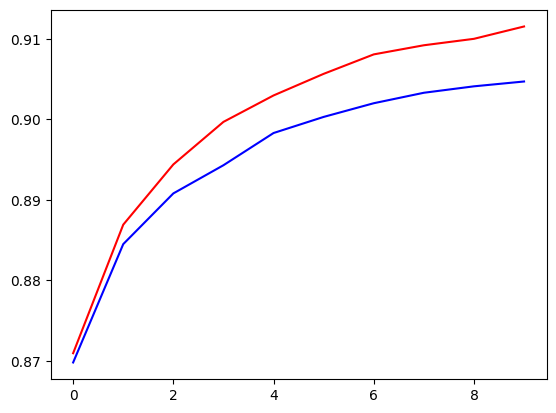

In [11]:
x = np.arange(0, 10, 1)
plt.plot(x, ytr,color='red')
plt.plot(x, yte,color='blue')
plt.show()

In [12]:
class nn2:
  def __init__(self, sizes):
    self.sizes = sizes
    self.weights = [np.random.uniform(-2, 2,size=(sizes[i-1], sizes[i]))
     for i in range(1, len(self.sizes))]
    self.biases = [np.random.uniform(-2, 2,size=(sizes[i],1))
     for i in range(1, len(self.sizes))]

  def feed_forward(self,input):
     a = input
     pre_activations = []
     activations = [a]
     z = np.dot(self.weights[0].T, a) + self.biases[0]
     a = Relu(z)
     pre_activations.append(z)
     activations.append(a)
     z = np.dot(self.weights[1].T, a) + self.biases[1]
     a = Softmax(z)
     pre_activations.append(z)
     activations.append(a)
     return a ,pre_activations,activations

  def compute_deltas(self, pre_activations, y_true, y_pred):
      delta_L = (y_pred-y_true)
      deltas = [0] * (len(self.sizes) - 1)
      deltas[-1] = delta_L
      for l in range(len(deltas) - 2, -1, -1):
            delta = np.dot(self.weights[l + 1], deltas[l + 1]
                           ) * Relu_deriv(pre_activations[l])
            deltas[l] = delta
      return deltas
  def backpropagate(self, deltas, pre_activations, activations):
        dW = []
        db = []
        dW0_l = np.dot(deltas[0], activations[0].T).T * Relu_deriv(pre_activations[0])
        db0_l = deltas[0] * Relu_deriv(pre_activations[0])
        dW.append(dW0_l)
        db.append(db0_l)
        dW1_l = np.dot(deltas[1], activations[1].T).T
        db1_l = deltas[1]
        dW.append(dW1_l)
        db.append(db1_l)
        return dW, db
  def train(self,alpha,dW,db):
      for i in range(len(dW)):
          self.weights[i] -= alpha*dW[i]
      for i in range(len(db)):
          self.biases[i] -= alpha*db[i]

In [16]:
yte = []
ytr = []
nuenet2 = nn2([784,30,10])
for _ in range(10):
   for i in range(len(train_x)):
       A0 = train_x[i].flatten().reshape((-1, 1))
       A0 = A0 / 255
       arr = nuenet2.feed_forward(A0)
       yhat =  np.zeros((10, 1))
       yhat[train_y[i]][0] = 1
       deltas = nuenet2.compute_deltas(arr[1],yhat,arr[0])
       dW, db = nuenet2.backpropagate(deltas,arr[1],arr[2])
       nuenet2.train(0.0001,dW,db)
   yte.append(accuracy(test_x,test_y,nuenet2))
   ytr.append(accuracy(train_x,train_y,nuenet2))
   print(accuracy(test_x,test_y,nuenet2))
   print('=============================')

0.8671
0.8695
0.8702
0.8753
0.8809
0.8812
0.8826
0.8819
0.8835
0.8827


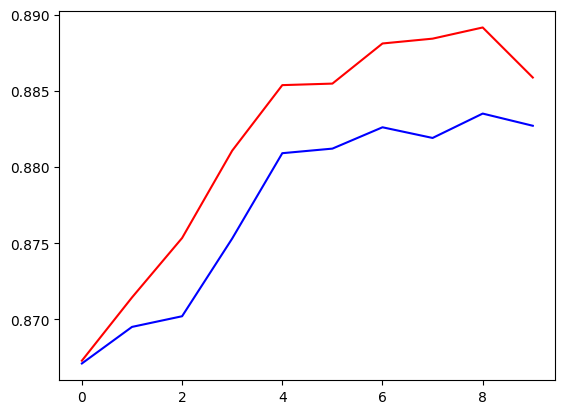

In [17]:
x = np.arange(0, 10, 1)
plt.plot(x, ytr,color='red')
plt.plot(x, yte,color='blue')
plt.show()

In [18]:
class nn3:
  def __init__(self, sizes):
    self.sizes = sizes
    self.weights = [np.random.uniform(-2, 2,size=(sizes[i-1], sizes[i]))
     for i in range(1, len(self.sizes))]
    self.biases = [np.random.uniform(-2, 2,size=(sizes[i],1))
     for i in range(1, len(self.sizes))]

  def feed_forward(self,input):
     a = input
     pre_activations = []
     activations = [a]
     z = np.dot(self.weights[0].T, a) + self.biases[0]
     a = Relu(z)
     pre_activations.append(z)
     activations.append(a)
     z = np.dot(self.weights[1].T, a) + self.biases[1]
     a = Sigmoid(z)
     pre_activations.append(z)
     activations.append(a)
     z = np.dot(self.weights[2].T, a) + self.biases[2]
     a = Softmax(z)
     pre_activations.append(z)
     activations.append(a)
     return a ,pre_activations,activations

  def compute_deltas(self, pre_activations, y_true, y_pred):
      delta_L = (y_pred-y_true)
      deltas = [0] * (len(self.sizes) - 1)
      deltas[2] = delta_L
      delta = np.dot(self.weights[2], deltas[2]
                           ) * Sigmoid_deriv(pre_activations[1])
      deltas[1] = delta
      delta = np.dot(self.weights[1], deltas[1]
                           ) * Relu_deriv(pre_activations[0])
      deltas[0] = delta
      return deltas
  def backpropagate(self, deltas, pre_activations, activations):
        dW = []
        db = []
        dW0_l = np.dot(deltas[0], activations[0].T).T * Relu_deriv(pre_activations[0])
        db0_l = deltas[0] * Relu_deriv(pre_activations[0])
        dW.append(dW0_l)
        db.append(db0_l)
        dW1_l = np.dot(deltas[1], activations[1].T).T* Sigmoid_deriv(pre_activations[1])
        db1_l = deltas[1] * Sigmoid_deriv(pre_activations[1])
        dW.append(dW1_l)
        db.append(db1_l)
        dW2_l = np.dot(deltas[2], activations[2].T).T
        db2_l = deltas[2]
        dW.append(dW2_l)
        db.append(db2_l)
        return dW, db
  def train(self,alpha,dW,db):
      for i in range(len(dW)):
          self.weights[i] -= alpha*dW[i]
      for i in range(len(db)):
          self.biases[i] -= alpha*db[i]

In [19]:
yte = []
ytr = []
nuenet3 = nn3([784,30,10,10])
for _ in range(10):
   for i in range(len(train_x)):
       A0 = train_x[i].flatten().reshape((-1, 1))
       A0 = A0 / 255
       arr = nuenet3.feed_forward(A0)
       yhat =  np.zeros((10, 1))
       yhat[train_y[i]][0] = 1
       deltas = nuenet3.compute_deltas(arr[1],yhat,arr[0])
       dW, db = nuenet3.backpropagate(deltas,arr[1],arr[2])
       nuenet3.train(0.00001,dW,db)
   yte.append(accuracy(test_x,test_y,nuenet3))
   ytr.append(accuracy(train_x,train_y,nuenet3))
   print(accuracy(test_x,test_y,nuenet3))
   print('=============================')

<ipython-input-5-70f835a8c370>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.3859
0.4344
0.4318
0.4714
0.4758
0.5162
0.5153
0.5398
0.5411
0.588


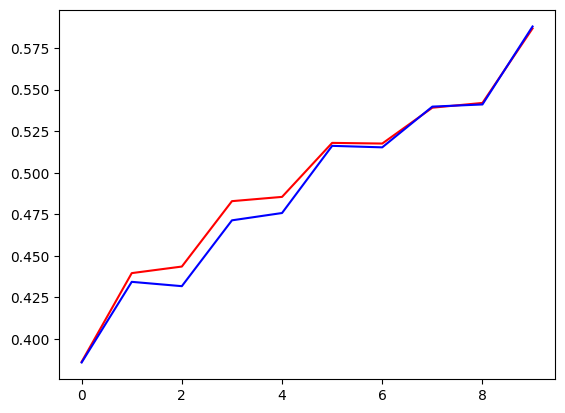

In [20]:
x = np.arange(0, 10, 1)
plt.plot(x, ytr,color='red')
plt.plot(x, yte,color='blue')
plt.show()